#  Intro I.A. - Trabajo Práctico Nº 3   
### Clasificador de Bayes ingenuo

**Autor**: Julio Donadello  
**Correo**: juliodonadello@gmail.com

---

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Scikit-learn nos ofrece una variedad ampliada de modelos Naive Bayes, para este problema usamos MultinomialNB que es pensado para este tipo de problemas
from sklearn.naive_bayes import MultinomialNB   

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
import warnings
warnings.filterwarnings("ignore")

1. ¿Cuáles son las 10 palabras más encontradas en correos con SPAM y en correos No SPAM? ¿Hay palabras en común? ¿Algunas llaman la atención?

### Apertura dataset

In [5]:
dataset = pd.read_csv("dataset/spambase.csv") # cargando los datos desde un CSV
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,spam
0,0,640,640,0,320,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,1
1,210,280,500,0,140,280,210,70,0,940,...,0,0,0,0,132,0,372,180,48,1
2,60,0,710,0,1230,190,190,120,640,250,...,60,0,0,10,143,0,276,184,10,1
3,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,137,0,137,0,0,1
4,0,0,0,0,630,0,310,630,310,630,...,0,0,0,0,135,0,135,0,0,1


In [6]:
df_1 = dataset.groupby(by="spam").sum()
top_spam = df_1.loc[1].sort_values(ascending=False)[:10]
top_no_spam = df_1.loc[0].sort_values(ascending=False)[:10]

In [7]:
#TOP 10 palabras mas encontradas en correos con SPAM y sin SPAM
top_spam,top_no_spam

(word_freq_you         4105599
 word_freq_your        2502597
 word_freq_will         997100
 word_freq_free         939790
 word_freq_our          931799
 char_freq_!            931352
 word_freq_all          732080
 word_freq_mail         635470
 word_freq_email        578759
 word_freq_business     521250
 Name: 1, dtype: int64,
 word_freq_you        3541702
 word_freq_george     3527559
 word_freq_hp         2496576
 word_freq_will       1495268
 word_freq_your       1223098
 word_freq_hpl        1204398
 word_freq_re         1159138
 word_freq_edu         800669
 word_freq_address     681569
 word_freq_meeting     604460
 Name: 0, dtype: int64)

(Rta)  
    Hay palabras en común, por ejemplo: "you", "will". Por otro lado, hay palabras en el top que llaman la atención como por ejemplo "mail", "free", "business" o "!" en los spams. Y "re" o "meeting" en los email libres de spam.

---

2. Separe el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba (70% y 30% respectivamente).

### Separación del dataset

In [8]:
X_full = dataset.drop(columns="spam")
y_full = dataset["spam"]

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X_full, y_full, test_size = 0.3)

In [10]:
len(X_train)/len(X_full), len(X_test)/len(X_full)

(0.699847859161052, 0.30015214083894803)

---

3. Utilizando un clasificador de Bayes ingenuo, entrene con el conjunto de entrenamiento.

### Entrenamiento  
Se entrena el modelo Naive Bayes con los datos no escalados ya que este modelo está diseñado para trabajar con características que representan recuentos o frecuencias.

In [11]:
model_NB = MultinomialNB()

In [12]:
model_NB.fit(X=X_train,y=y_train)

MultinomialNB()

---

4. Utilizando un clasificador de Regresión Logística, entrene con el conjunto de entrenamiento (en este caso, normalice los datos).

### Normalización

In [13]:
# tipo de escalamiento: Min-Max
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
model_LR = LogisticRegression()
model_LR.fit(X=X_train_scaled,y=y_train)

LogisticRegression()

---

5. Calcule la matriz de confusión del conjunto de evaluación para ambos modelos. ¿Qué tipo de error comete más cada modelo? ¿Cuál de los dos tipos de error crees que es más importante para este problema?

In [15]:
confusion_matrix, ConfusionMatrixDisplay

(<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>,
 sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay)

In [16]:
y_pred_NB = model_NB.predict(X_test)
y_pred_LR = model_LR.predict(X_test)

In [17]:
cm_NB = confusion_matrix(y_true=y_test, y_pred=y_pred_NB,labels=model_NB.classes_)
cm_LR = confusion_matrix(y_true=y_test, y_pred=y_pred_LR,labels=model_LR.classes_)

### Matriz de confusión usando Naive Bayes

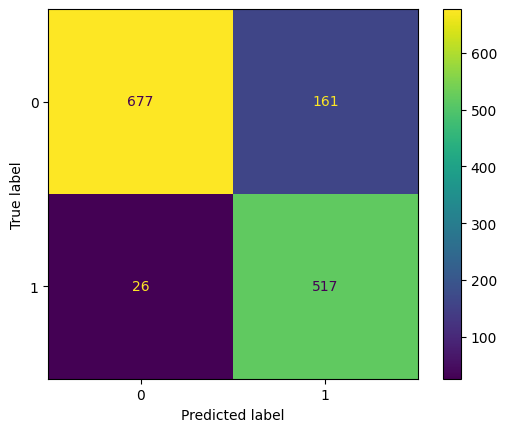

In [18]:
disp_NB = ConfusionMatrixDisplay(confusion_matrix=cm_NB,
                              display_labels=model_NB.classes_)
disp_NB.plot()
plt.show()

### Matriz de confusión usando Regresión Lineal

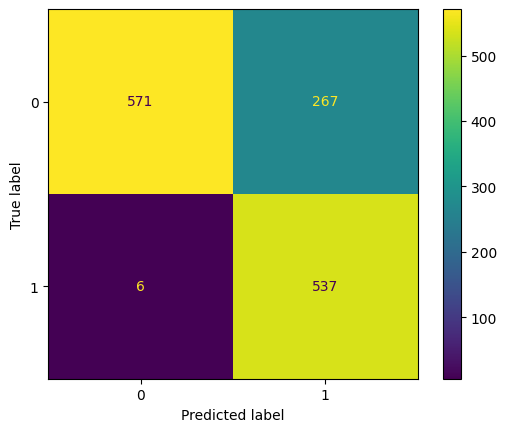

In [19]:
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR,
                              display_labels=model_LR.classes_
                              )
disp_LR.plot()
plt.show()

(Rta)   
    Como se puede ver en las ilustraciones, el modelo Naive Bayes comete más errores de tipo falso positivo (161) al igual que el modelo de Regresión Lineal (267).  
    El modelo Naive Bayes tiene un mejor desempeño en la medición realizada contra el dataset de test. Esto se debe al caso de uso de "detección de spam", donde lo que más pondera al modelo es tener pocos falsos positivos. Es decir, no categorizar como spam a los emails que no lo son. Ya que si el usuario tuviera alguna regla de filtrado, perdería dichos emails.   
    Por otro lado, considero que no es tan relevante la métrica de falsos negativos ya que no se trata de un detector de ciberdelitos o scams, si no que se trabaja con spams como promociones, etc. Y el hecho de no categorizar uno de estos emails como spam no es tan trascendente para el usuario.

---

6. Calcule la precisión y la recuperación de ambos modelos. Para cada métrica, ¿cuál es el mejor modelo? ¿Cómo se relacionan estas métricas con los tipos de errores analizados en el punto anterior? Expanda su respuesta.

In [20]:
precision_NB = precision_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)

precision_LR = precision_score(y_test, y_pred_LR)
recall_LR = recall_score(y_test, y_pred_LR)

In [21]:
print("Precisión del modelo de Naive Bayes:", precision_NB)
print("Recuperación del modelo de Naive Bayes:", recall_NB)
print("Precisión del modelo de Regresión Logística:", precision_LR)
print("Recuperación del modelo de Regresión Logística:", recall_LR)

Precisión del modelo de Naive Bayes: 0.7625368731563422
Recuperación del modelo de Naive Bayes: 0.9521178637200737
Precisión del modelo de Regresión Logística: 0.667910447761194
Recuperación del modelo de Regresión Logística: 0.988950276243094


(Rta)   
    Para la metrica de Precisión, el mejor modelo es el Naive Bayes.  
    Para la metrica de Recuperación, el mejor modelo es la Regresión Logística. 
    De la documentación de scikit-learn se puede ver como se compone cada ratio:

- recall: tp / (tp + fn)
- precision: tp / (tp + fp)   

Esto nos indica que la recuperación (recall) es un ratio que mide la eficiencia con la que **detectamos** mientras que la precisión (precision) nos mide la eficiencia con la que **clasificamos**.   
Se ve claramente en los divisores de los ratios, es decir, en la base de los mismos. La recuperación considera los falsos negativos ya que son targets positivos que no estamos capturando mientras que la precisión considera los falsos positivos ya que son targets negativos que estamos clasificando mal. 
    

---

7. Obtenga la curva ROC y el AUC (Área Bajo la Curva ROC) de ambos modelos.

In [22]:
from sklearn.metrics import roc_curve, auc

In [33]:
fpr_NB, tpr_NB, thr_NB = roc_curve(y_true=y_test,y_score=y_pred_NB)
fpr_LR, tpr_LR, thr_LR = roc_curve(y_true=y_test,y_score=y_pred_LR)

roc_auc_NB = auc(fpr_NB, tpr_NB)
roc_auc_LR = auc(fpr_LR, tpr_LR)

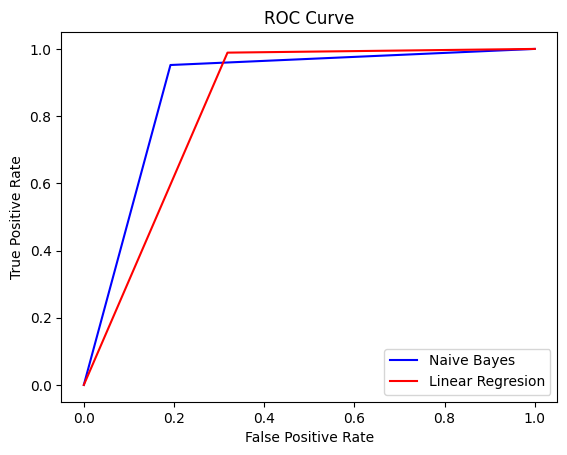

AUC - NB: 0.8799968793540702
AUC - LR: 0.8351672622265589


In [24]:

# Graficar la curva ROC
plt.figure()
plt.plot(fpr_NB, tpr_NB, color='blue', label='Naive Bayes')
plt.plot(fpr_LR, tpr_LR, color='red', label='Linear Regresion')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC - NB:", roc_auc_NB)
print("AUC - LR:", roc_auc_LR)

### Extra   
Selección de threshold óptimo para cada modelo basado en la curva ROC

In [25]:
import numpy as np

In [26]:
#seleccion del thr usando la media geométrica de la curva ROC
gmeans_NB = np.sqrt(tpr_NB * (1-fpr_NB))
gmeans_LR = np.sqrt(tpr_NB * (1-fpr_NB))

best_thr_NB = thr_NB[np.argmax(gmeans_NB)]
best_thr_LR = thr_LR[np.argmax(gmeans_LR)]

print('Best Threshold for Naive Bayes=%f, G-Mean=%.3f' % (best_thr_NB, np.argmax(gmeans_NB)))
print('Best Threshold for Linear Regresion=%f, G-Mean=%.3f' % (best_thr_LR, np.argmax(gmeans_LR)))

#ix=np.argmax(gmeans)
#ax.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold=%.3f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))


Best Threshold for Naive Bayes=1.000000, G-Mean=1.000
Best Threshold for Linear Regresion=1.000000, G-Mean=1.000


In [40]:
thr_NB, thr_LR

(array([inf,  1.,  0.]), array([inf,  1.,  0.]))

OBS:  Se está obteniendo un unico treshold útil en el array thr. Esto se debe a la naturaleza del clasificador y por ende no tiene sentido el cálculo de la G-Mean.   
Ref: https://stats.stackexchange.com/questions/322927/the-purpose-of-threshold-in-naive-bayes-algorithm

Se puede probar con métodos de cross validation para obtener distintos thresholds pero por la naturaleza del NB van a tender a 1.